In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Any results you write to the current directory are saved as output.
df = pd.read_csv('bgg_db_2017_04.csv', encoding='latin1')

In [2]:
df.head(5)

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
0,1,https://boardgamegeek.com/boardgame/161936/pan...,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66905,8.48904,18009,https://cf.geekdo-images.com/images/pic2452831...,13,"Action Point Allowance System, Co-operative Pl...",29472,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8076
1,2,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.72977,8.30744,7309,https://cf.geekdo-images.com/images/pic2663291...,14,"Action Point Allowance System, Auction/Bidding...",10007,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3093
2,3,https://boardgamegeek.com/boardgame/12333/twil...,12333,Twilight Struggle,2,2,180,180,180,2005,8.35745,8.22021,27403,https://cf.geekdo-images.com/images/pic361592.jpg,13,"Area Control / Area Influence, Campaign / Batt...",37382,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5317
3,4,https://boardgamegeek.com/boardgame/120677/ter...,120677,Terra Mystica,2,5,150,60,150,2012,8.29627,8.15458,24267,https://cf.geekdo-images.com/images/pic1356616...,12,"Route/Network Building, Variable Phase Order, ...",27948,"Civilization, Economic, Fantasy, Territory Bui...","Jens Drögemüller, Helge Ostertag",3.9387
4,5,https://boardgamegeek.com/boardgame/174430/glo...,174430,Gloomhaven,1,4,150,90,150,2017,9.08970,8.15151,3978,https://cf.geekdo-images.com/images/pic2437871...,12,"Action / Movement Programming, Campaign / Batt...",6057,"Adventure, Economic, Exploration, Fantasy, Fig...",Isaac Childres,3.7028


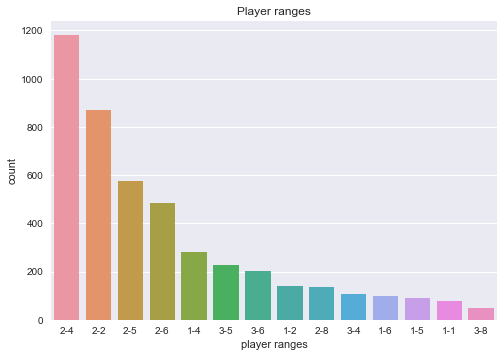

In [3]:
df['player_range'] = df['min_players'].astype(str) + '-' + df['max_players'].astype(str)
range_count = df['player_range'].value_counts()
range_count = range_count[range_count > 50] # trim rare occurences
ax = sns.barplot(x=range_count.index, y=range_count)
sns.plt.title('Player ranges')
ax.set(xlabel='player ranges', ylabel='count')
plt.show()

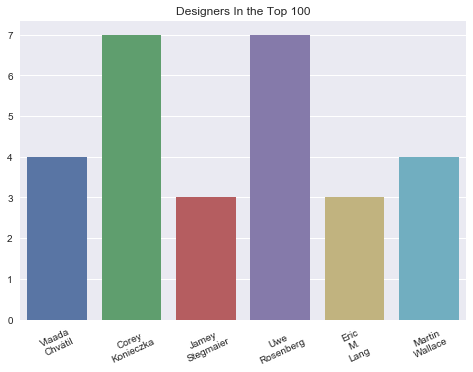

In [4]:
top_dudes = df[:100]['designer'].tolist()
top_dudes = [dude.split(', ') for dude in top_dudes]
top_dudes = chain(*top_dudes)
top_dudes = [name.replace(' ', '\n') for name in top_dudes ]
dude_count = Counter(top_dudes)
dude_count = {name:dude_count[name] for name in dude_count if dude_count[name] > 2}
ax = sns.barplot(x=[str(i) for i in dude_count.keys()], y=[i for i in dude_count.values()])
sns.plt.title('Designers In the Top 100')
plt.xticks(rotation=25)
plt.show()

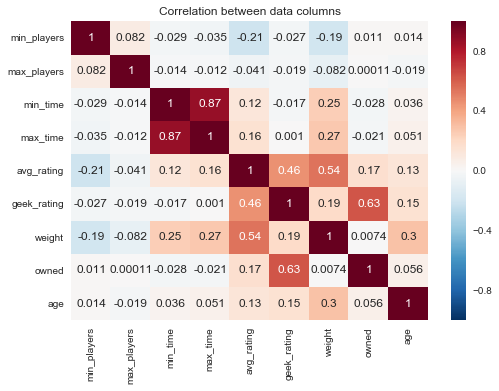

In [5]:
cols = ['min_players', 'max_players', 'min_time', 'max_time', 'avg_rating',
        'geek_rating', 'weight', 'owned', 'age' ]
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)
sns.plt.title('Correlation between data columns')
plt.show()

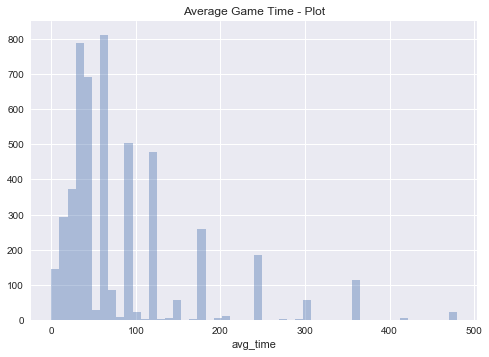

In [6]:
df['avg_time'] = (df['max_time'] + df['max_time'])/2
avgtime_df = df[df['avg_time'] < 500]
sns.distplot(avgtime_df['avg_time'], kde = False)
sns.plt.title('Average Game Time - Plot')
plt.show()

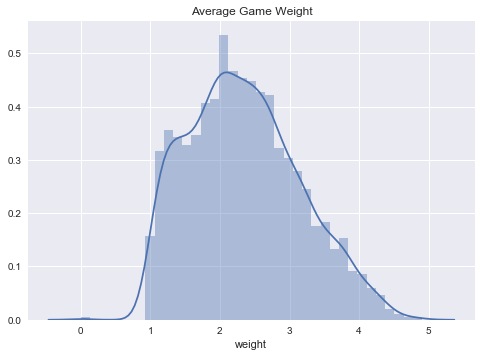

In [7]:
sns.distplot(df['weight'])
sns.plt.title('Average Game Weight')
plt.show()

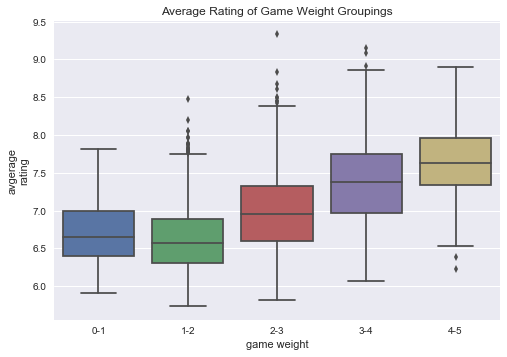

In [8]:
bins = [-1, 1, 2, 3, 4, 5]
df['weight_cat'] = pd.cut(df['weight'], bins=bins, labels=bins[1:])
weight = [df[df['weight_cat'] == i]['avg_rating'] for i in range(1,6)]
ax = sns.boxplot(data=weight)
ax.set(xlabel='game weight', ylabel='avgerage\nrating', title='Average Rating of Game Weight Groupings', xticklabels=['0-1', '1-2', '2-3', '3-4', '4-5'])
plt.show()

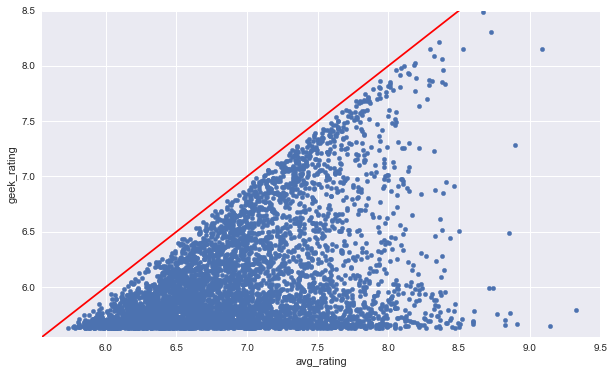

In [9]:
fig1, ax1 = plt.subplots(figsize=(10,6))
df.plot(x='avg_rating', y='geek_rating', ax=ax1, kind='scatter')
myX = [5.0,10.0]
myY = [5.0,10.0]
ax1.plot(myX, myY, color='red')
plt.xlim([5.55,9.5])
plt.ylim([5.55,8.5])
plt.show()

Huge spread there at lower number of geek ratings. Also interestingly, the geek rating never goes above the average rating.

In [10]:
df.category.unique()

array(['Environmental, Medical', 'Card Game, Civilization, Economic',
       'Modern Warfare, Political, Wargame', ...,
       'Ancient, Civilization, Negotiation',
       'Bluffing, Miniatures, Wargame, World War II',
       'Exploration, Prehistoric, Puzzle, Real-time, Territory Building'], dtype=object)